In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
itemids = [50817,51301,51144,51288,50889,50861,53084,50878,53088,50885,53089,51842,52024,51237,51675,51240,51002,51003,52642,50809,50931,52569,50983,52623,50811,51222,51640,50902,52535,50882,50813,52442,53154,52022,53138,50862,53085,220045,220210,227242,227243,223762]

##### Bases

In [3]:
BASES = "../../Databases/MIMIC/"
patient = "patients.csv"
admission = "admissions.csv"
diagnostics = "diagnoses_icd.csv"
icd_diagnostics = "d_icd_diagnoses.csv"
lab = "labevents.csv"
lab_items = "d_labitems.csv"
chart_items = "d_items.csv"
chart = "chartevents.csv"

url_patient = BASES + patient
url_admission = BASES + admission
url_diagnostics = BASES + diagnostics
url_icd_diagnostics = BASES + icd_diagnostics
url_lab = BASES + lab
url_lab_items = BASES + lab_items
url_chart_items = BASES + chart_items
url_chart = BASES + chart

In [4]:
df_labevents = pd.read_csv(url_lab)
df_chartvents = pd.read_csv(url_chart)
df_admissions = pd.read_csv(url_admission)

##### Exames

In [5]:
def aggregate_events(df):
    itemid_map = {
        'Albumine': [52022, 53138, 50862, 53085],
        'Lactate': [50813, 52442, 53154],
        'Bicarbonate': [50813, 52442, 53154],
        'Chloride': [50902, 52535],
        'Hemoglobin': [50811, 51222, 51640],
        'Sodium': [50983, 52623],
        'Glucose': [50809, 50931, 52569],
        'Troponin': [51002, 51003, 52642],
        'Platelets': [51240],
        'INR': [51237, 51675],
        'Creatinine': [50813, 52442, 53154],
        'Bun': [51842],
        'Bilirubin': [50885, 53089],
        'AST': [50878, 53088],
        'ALT': [50861, 53084],
        'C_reactive': [50889],
        'ESR': [51288],
        'Bands': [51144],
        'WBC': [51301],
        'Oxygen_saturation': [50817],
        'Temperature': [223762],
        'Systolic_pressure': [227242, 227243],
        'Respiratory_rate': [220210],
        'Heart_rate': [220045]
    }
    
    for key, itemids in itemid_map.items():
        new_col = df['itemid'].isin(itemids) * df["value"]
        new_col[new_col == ""] = np.NaN
        new_col[new_col == "___"] = np.NaN
        df[key] = new_col
    return df


In [6]:
df_selected_labevents = df_labevents[['subject_id', 'hadm_id','charttime','itemid', 'value']]
df_selected_chartvents = df_chartvents[['subject_id', 'hadm_id','charttime','itemid', 'value']]
df_exams = pd.concat([df_selected_chartvents,df_selected_labevents],ignore_index=True)
df_exams = df_exams[df_exams['itemid'].isin(itemids)].copy()

In [7]:
df_admissions = df_admissions[['subject_id', 'hadm_id', 'admittime']]
df_exams = pd.merge(df_exams,df_admissions,on = ['subject_id','hadm_id'],how = 'left')

Calculo do offset dos exames

In [8]:
# Convertendo colunas para datetime
df_exams['charttime'] = pd.to_datetime(df_exams['charttime'])
df_exams['admittime'] = pd.to_datetime(df_exams['admittime'])
# Calculando os offsets
df_exams['offsettime'] = df_exams['charttime'] - df_exams['admittime']

In [9]:
df_exams = aggregate_events(df_exams)
df_exams.drop(['itemid','value'],axis = 1,inplace = True)


In [10]:
df_exams.sort_values(by='offsettime',ascending=False)

,subject_id,hadm_id,charttime,admittime,offsettime,Albumine,Lactate,Bicarbonate,Chloride,Hemoglobin,...,ALT,C_reactive,ESR,Bands,WBC,Oxygen_saturation,Temperature,Systolic_pressure,Respiratory_rate,Heart_rate
41370,10020740,23831430.0,2150-04-24 06:29:00,2150-03-11 15:34:00,43 days 14:55:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41369,10020740,23831430.0,2150-04-24 06:29:00,2150-03-11 15:34:00,43 days 14:55:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41367,10020740,23831430.0,2150-04-24 06:29:00,2150-03-11 15:34:00,43 days 14:55:00,NaN,NaN,NaN,NaN,9.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41375,10020740,23831430.0,2150-04-24 06:29:00,2150-03-11 15:34:00,43 days 14:55:00,NaN,NaN,NaN,NaN,NaN,...,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41368,10020740,23831430.0,2150-04-24 06:29:00,2150-03-11 15:34:00,43 days 14:55:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53010,10014354,NaN,2150-05-29 08:59:00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53011,10014354,NaN,2150-05-29 08:59:00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53012,10014354,NaN,2150-05-29 08:59:00,NaT,NaT,NaN,NaN,NaN,99,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53013,10014354,NaN,2150-05-29 08:59:00,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_exams['hours'] = (df_exams['offsettime'].dt.total_seconds()//(60*60*24)).values.astype(int)

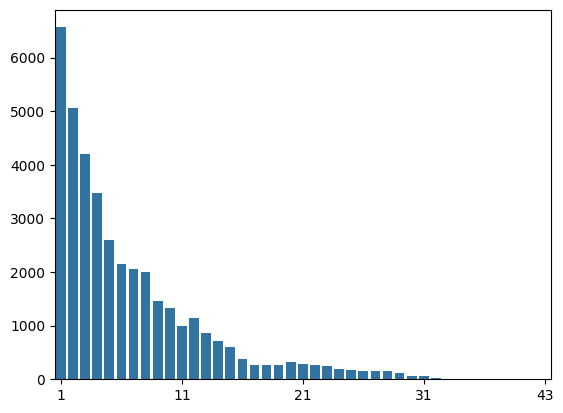

In [40]:
x,y= np.unique(df_exams[(df_exams['hours']>0)]['hours'],return_counts=True)
sns.barplot(x=x,y=y)
plt.xticks([0,10,20,30,40])
plt.show()

In [20]:
y

(array([21921,  7666,  4336,  1961,  1130,  1032,   497,   109,    12,
           31]),
 array([ 1. ,  5.2,  9.4, 13.6, 17.8, 22. , 26.2, 30.4, 34.6, 38.8, 43. ]))